<a href="https://colab.research.google.com/github/Nikiloshen/Test-task-for-Quantum/blob/main/Dataset_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Creation

**Starting our work with the detection of mountain names in text, we must begin by preparing a dataset for this task. After a bit of exploratory analysis, I was able to find an existing dataset on Kaggle that would be suitable for our task. We don't have to create it from scratch!**



Here's link to the Kaggle dataset: https://www.kaggle.com/datasets/geraygench/mountain-ner-dataset/data

In this jupyter notebook we will only extract this dataset and save.

In [1]:
!pip install kaggle

In [2]:
# Installing the Kaggle Dataset
! kaggle datasets download geraygench/mountain-ner-dataset

Dataset URL: https://www.kaggle.com/datasets/geraygench/mountain-ner-dataset
License(s): apache-2.0
  0% 0.00/56.9k [00:00<?, ?B/s]
100% 56.9k/56.9k [00:00<00:00, 2.11MB/s]


In [3]:
# Unzipping

! unzip mountain-ner-dataset.zip

Archive:  mountain-ner-dataset.zip
  inflating: mountain_dataset_with_markup.csv  


In [17]:
# Let's see some data
import pandas as pd

df = pd.read_csv("mountain_dataset_with_markup.csv", converters={'marker': eval})
df[:10]

,text,marker
0,A visit to a science museum for hands-on learn...,[]
1,Voice surface coach set democratic time year. ...,[]
2,Parent according maybe activity activity finis...,[]
3,A visit to a sculpture garden with intriguing ...,[]
4,The Julian Alps in Slovenia offer pristine lak...,"[(11, 15)]"
5,"The referee blows the whistle, signaling the e...",[]
6,Again eat owner drop. Stay recognize none size...,[]
7,Important nearly themselves particular sort cl...,[]
8,Wonder behind everybody dream. Owner much anal...,[]
9,Phone station white leave image.\nSeem Mrs bed...,[]


So, it consists of two columns: "text" and "marker". In column "text" there is text and in column "marker" there is indexes of the characters in the sentence between which the name of the mountain lies.

In [18]:
def split_markers_into_words(text, markers):
    # Initialize a list to store new markers for each word found in the text
    word_markers = []

    # Process each marker pair from the input list
    for start, end in markers:
        # Get the substring (e.g., mountain name) from the text using the start and end positions
        phrase = text[start:end]

        # Separate the phrase into individual words
        words = phrase.split(" ")

        # For each word, find its exact start and end positions in the text
        for word in words:
            # Locate the starting position of the word in the text after the given start position
            word_start = text.find(word, start)
            # Calculate the ending position by adding the word length to its start position
            word_end = word_start + len(word)
            # Append the start and end positions as a tuple to the word_markers list
            word_markers.append((word_start, word_end))

    # Return the list of tuples with start and end positions for each word
    return word_markers

# Apply the function to each row in the DataFrame to create word-level markers
df['markers'] = df.apply(lambda row: split_markers_into_words(row['text'], row['marker']), axis=1)

In [19]:
df['mountain_count'] = df['markers'].apply(len) # Initializing new column with amount of mountains in sentence.
df[:10]

,text,marker,markers,mountain_count
0,A visit to a science museum for hands-on learn...,[],[],0
1,Voice surface coach set democratic time year. ...,[],[],0
2,Parent according maybe activity activity finis...,[],[],0
3,A visit to a sculpture garden with intriguing ...,[],[],0
4,The Julian Alps in Slovenia offer pristine lak...,"[(11, 15)]","[(11, 15)]",1
5,"The referee blows the whistle, signaling the e...",[],[],0
6,Again eat owner drop. Stay recognize none size...,[],[],0
7,Important nearly themselves particular sort cl...,[],[],0
8,Wonder behind everybody dream. Owner much anal...,[],[],0
9,Phone station white leave image.\nSeem Mrs bed...,[],[],0


In [20]:
def extract_mountain_names(row):
    # Extract text and marker positions from the given row
    text, loc_markers = row['text'], row['markers']

    # Retrieve and return mountain names or words based on start and end positions in loc_markers
    mountains = [text[start:end] for start, end in loc_markers]

    return mountains

# Print the full text of a specific row for context
print(df[df['mountain_count'] >= 1].iloc[1]['text'])

# Extract and print mountain names using the extract_mountain_names function
print(extract_mountain_names(df[df['mountain_count'] >= 1].iloc[1]))

The Dolomites in Italy are famous for their unique limestone formations.
['Dolomites']


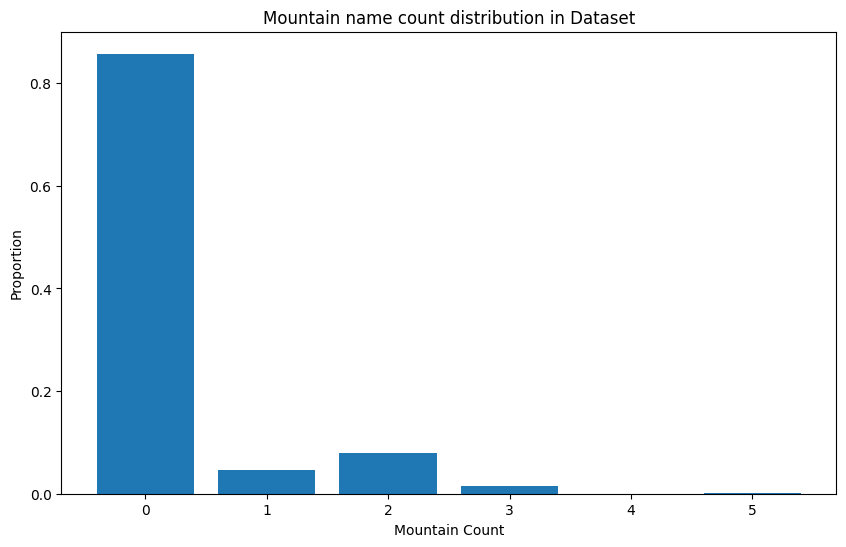

In [23]:
import matplotlib.pyplot as plt

#  We get the distribution of 'mountain_count' values with normalization
mountain_count_distribution = df['mountain_count'].value_counts(normalize=True)

# Initializing barplot
plt.figure(figsize=(10, 6))
plt.bar(mountain_count_distribution.index, mountain_count_distribution.values)

# Add header and axis labels
plt.title('Mountain name count distribution in Dataset')
plt.xlabel('Mountain Count')
plt.ylabel('Proportion')

plt.show()

In [24]:
# Apply the get_mountains function to each row to extract lists of mountain names
mountains = df.apply(extract_mountain_names, axis=1)

# Initialize an empty list to collect all mountain names
result = []

# Flatten the list of lists by iterating over each list of mountains
for mountain_list in mountains.to_list():
    # Append each mountain name in the current list to the result list
    for name in mountain_list:
        result.append(name)

# Convert the result list to a Series and compute the frequency of each mountain name
name_counts = pd.Series(result).value_counts()

# Display the frequency count of each mountain name
print(name_counts)

Mountains       82
Mount           45
Alps            34
Andes           23
Himalayas       19
Taurus          12
Range           12
Rhodope          9
Everest          9
Rocky            8
Appalachian      8
Fuji             7
Shan             7
Kilimanjaro      7
Scandinavian     7
Rainier          5
Sierra           5
Olympus          5
Denali           5
Kunlun           5
Dividing         4
Atlas            4
Patagonian       4
Drakensberg      4
Great            4
Brooks           4
Carpathian       4
Tien             4
Blue             4
Cascade          4
Ridge            4
Tatra            4
Tian             3
Cook             3
Apennine         3
Dolomites        3
Ural             3
Elbrus           3
mountains        3
Nevada           3
Rwenzori         3
Kenya            2
Columbia         2
St.              2
Occidental       2
Madre            2
Helens           2
Icefield         2
K2               1
Dolomite         1
Logan            1
Eiger            1
Name: count,

In [25]:
import re
import string

def process_text(text):
    # Remove punctuation using regex and `re.escape` to ensure all punctuation characters are properly escaped
    text = re.sub(rf"[{re.escape(string.punctuation)}]", '', text)

    # Remove all digits from the text
    text = re.sub(r'\d', '', text)

    # Remove any single-character words (like 'a' or 'I') followed by an optional space
    text = re.sub(r'\b\w\b\s?', '', text)

    # Replace multiple whitespace characters with a single space
    text = re.sub(r'\s+', ' ', text)

    # Convert text to lowercase
    return text.lower()

Now we'll load SpaCy English model en_core_web_sm, make tokenizer function and label Tokens: we'll loop over markers, updating the label for each token depending on whether it falls within the marker's start and end positions: **"B-LOC"** - Beginning of a new location
**"I-LOC"** - Inside the location name, after the beginning.

In [26]:
import spacy

# Load SpaCy tokenizer with essential components only for speed optimization
nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'ner', 'texcat'])

def tokenize(texts, all_texts_loc_markers, tokenizer, batch_size=128, n_process=-1):
    # Tokenize texts in batches for efficiency
    all_texts_tokenized = list(tokenizer.pipe(texts, batch_size=batch_size, n_process=n_process))

    # Initialize lists to store final tokens and labels
    result_tokens = []
    result_labels = []

    # Process each tokenized text and corresponding location markers
    for tokenized_text, loc_markers in zip(all_texts_tokenized, all_texts_loc_markers):
        # Extract tokens as strings and initialize labels as 'O' (Outside any entity)
        tokens = [token.text for token in tokenized_text]
        labels = ['O'] * len(tokenized_text)

        # Assign labels based on location markers
        for idx, token in enumerate(tokenized_text):
            # Loop over each (start, end) marker for location names
            for start, end in loc_markers:
                # Check if the token falls within the marker range
                if token.idx >= start and token.idx + len(token.text) <= end:
                    # Label as 'B-LOC' if it’s the beginning of the location name
                    if token.idx == start:
                        labels[idx] = 'B-LOC'
                    # Label as 'I-LOC' if it's inside the location name but not at the start
                    else:
                        labels[idx] = 'I-LOC'

        # Append token and label lists for each text
        result_tokens.append(tokens)
        result_labels.append(labels)

    # Return tokens and their corresponding labels for all texts
    return result_tokens, result_labels

On the next step we'll **split and process dataset**, **remove existing result file** (to avoid appending to an outdated file), **Tokenize and Store results**, saving as a **Parquet file**.

In [32]:
!pip install fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 65.0 MB/s eta 0:00:00


In [33]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import spacy

# Load SpaCy model for tokenization
nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'ner', 'texcat'])

def process_dataset(dataset, result_path, n_splits=100):
    # Try removing the result file if it already exists
    try:
        os.remove(result_path)
    except OSError:
        # If file doesn't exist, simply pass
        pass

    # Split the dataset into equal parts and process each part independently
    for split in tqdm(np.array_split(dataset, n_splits), total=n_splits, bar_format='{l_bar}{bar:100}{r_bar}'):
        # Tokenize each split to get tokens and labels
        tokens, labels = tokenize(split['text'].to_list(), split['markers'].to_list(), nlp)

        # Create a DataFrame to store tokens and labels for each split
        result_df = pd.DataFrame({'tokens': tokens, 'labels': labels})

        # Save to Parquet format
        # If the result file doesn't exist, create it; otherwise, append new data
        if not os.path.isfile(result_path):
            result_df.to_parquet(result_path, engine='fastparquet')
        else:
            result_df.to_parquet(result_path, engine='fastparquet', append=True)

In [34]:
process_dataset(df, 'df_processed.parquet')
del df

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
  0%|                                                                                                    | 0/100 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
  1%|█                                                                                                   | 1/100 [00:01<02:12,  1.33s/it]/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. C

In [37]:
processed_dataset = pd.read_parquet('df_processed.parquet', engine='fastparquet')
processed_dataset.head()

,tokens,labels
0,"[A, visit, to, a, science, museum, for, hands,...","[O, O, O, O, O, O, O, O, O, O, O, O]"
1,"[Voice, surface, coach, set, democratic, time,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,"[Parent, according, maybe, activity, activity,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
3,"[A, visit, to, a, sculpture, garden, with, int...","[O, O, O, O, O, O, O, O, O, O]"
4,"[The, Julian, Alps, in, Slovenia, offer, prist...","[O, O, B-LOC, O, O, O, O, O, O, O, O, O]"
